In [17]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from pathlib import Path

In [18]:
ds_path = Path("../data/GDBDv2/annotation.csv").resolve()
out_path = Path("../data/GDBDv2/").resolve()

In [19]:
ds_path

PosixPath('/home/a.klykov/doc_enhancement/data/GDBDv2/annotation.csv')

In [20]:
df = pd.read_csv(ds_path, index_col=0)

In [21]:
df

,noisy_img_path,gt_img_path,dataset_type
0,NoisyImages/h-dibco2018_4.bmp,GTImages/h-dibco2018_4.bmp,h-dibco2018
1,NoisyImages/h-dibco2018_3.bmp,GTImages/h-dibco2018_3.bmp,h-dibco2018
2,NoisyImages/h-dibco2018_2.bmp,GTImages/h-dibco2018_2.bmp,h-dibco2018
3,NoisyImages/h-dibco2018_1.bmp,GTImages/h-dibco2018_1.bmp,h-dibco2018
4,NoisyImages/h-dibco2018_8.bmp,GTImages/h-dibco2018_8.bmp,h-dibco2018
...,...,...,...
10427,NoisyImages/noisyoffice_FontLse_Noisef_VA.bmp,GTImages/noisyoffice_FontLse_Clean_VA.bmp,noisyoffice
10428,NoisyImages/noisyoffice_Fontnse_Noisef_TR.bmp,GTImages/noisyoffice_Fontnse_Clean_TR.bmp,noisyoffice
10429,NoisyImages/noisyoffice_FontLtm_Noisef_VA.bmp,GTImages/noisyoffice_FontLtm_Clean_VA.bmp,noisyoffice
10430,NoisyImages/noisyoffice_Fontnse_Noisew_TR.bmp,GTImages/noisyoffice_Fontnse_Clean_TR.bmp,noisyoffice


In [23]:
X_test = df.loc[df["dataset_type"] == "dibco2013"]
X_test

,noisy_img_path,gt_img_path,dataset_type
75,NoisyImages/dibco2013_PR05.bmp,GTImages/dibco2013_PR05.bmp,dibco2013
76,NoisyImages/dibco2013_HW04.bmp,GTImages/dibco2013_HW04.bmp,dibco2013
77,NoisyImages/dibco2013_PR07.bmp,GTImages/dibco2013_PR07.bmp,dibco2013
78,NoisyImages/dibco2013_HW03.bmp,GTImages/dibco2013_HW03.bmp,dibco2013
79,NoisyImages/dibco2013_HW02.bmp,GTImages/dibco2013_HW02.bmp,dibco2013
80,NoisyImages/dibco2013_PR03.bmp,GTImages/dibco2013_PR03.bmp,dibco2013
81,NoisyImages/dibco2013_PR04.bmp,GTImages/dibco2013_PR04.bmp,dibco2013
82,NoisyImages/dibco2013_HW05.bmp,GTImages/dibco2013_HW05.bmp,dibco2013
83,NoisyImages/dibco2013_PR06.bmp,GTImages/dibco2013_PR06.bmp,dibco2013
84,NoisyImages/dibco2013_PR01.bmp,GTImages/dibco2013_PR01.bmp,dibco2013


In [24]:
X_train = df.drop(X_test.index, axis=0)
X_train = X_train.sample(frac=1)
X_train

,noisy_img_path,gt_img_path,dataset_type
9229,NoisyImages/lshdib_input_5257.bmp,GTImages/lshdib_input_5257.bmp,lshdib
6903,NoisyImages/lshdib_input_4722.bmp,GTImages/lshdib_input_4722.bmp,lshdib
7471,NoisyImages/lshdib_input_2097.bmp,GTImages/lshdib_input_2097.bmp,lshdib
7957,NoisyImages/lshdib_input_9854.bmp,GTImages/lshdib_input_9854.bmp,lshdib
4552,NoisyImages/lshdib_input_551.bmp,GTImages/lshdib_input_551.bmp,lshdib
...,...,...,...
4647,NoisyImages/lshdib_input_1779.bmp,GTImages/lshdib_input_1779.bmp,lshdib
9840,NoisyImages/lshdib_input_5861.bmp,GTImages/lshdib_input_5861.bmp,lshdib
1432,NoisyImages/lshdib_input_4966.bmp,GTImages/lshdib_input_4966.bmp,lshdib
9202,NoisyImages/lshdib_input_8182.bmp,GTImages/lshdib_input_8182.bmp,lshdib


In [25]:
len(X_train)

10416

<Axes: >

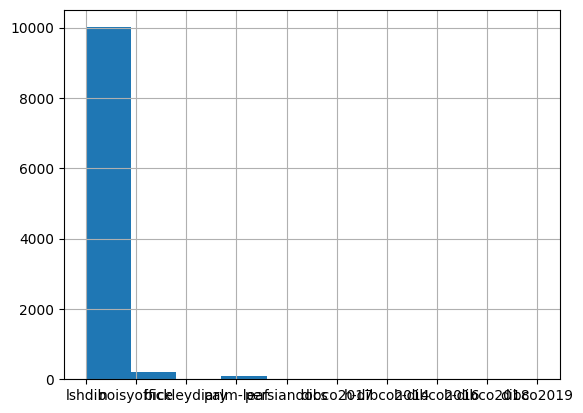

In [26]:
X_train.dataset_type.hist()

In [27]:
len(X_test)

16

<Axes: >

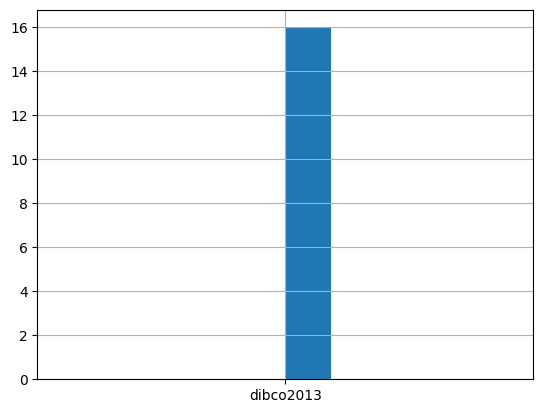

In [28]:
X_test.dataset_type.hist()

In [29]:
X_train.to_csv(out_path.joinpath("train_metadata.csv"))

In [30]:
X_test.to_csv(out_path.joinpath("val_metadata.csv"))